# Computational Project 3
## Kyle Corcoran
### October 12, 2018

### Introduction

The Lorenz model is a famous case in chaos theory created by Edward Lorenz to model atmospheric fluid flow due to a temperature difference imposed on a two dimensional fluid that has uniform depth ( http://www-users.math.umn.edu/~mcgehee/Seminars/ClimateChange/presentations/20081007.pdf ).  This model has been recreated many times over due to its significance in the creation of the field of chaos theory.  The mathematics consist of three coupled differential equations:

$$ \frac{dx}{dt} = -\sigma\left(x-y\right) $$

$$\frac{dy}{dt} = x\left(r-z\right)-y $$

$$ \frac{dz}{dt} = xy-bz. $$
According to Ref 1, $\sigma$ is the Prandlt number and describes the ratio between momentum diffusivity and thermal diffusivity, $r$ is the Rayleigh number which describes if the heat transfer is in the form of conduction or convection, and $b$ is a geometric factor.  These differential equations are non-linear, but can be numerically integrated to obtain the steady states describing the system.

### Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import ode
import matplotlib.gridspec as gridspec

In [2]:
%matplotlib notebook

### Functions for Later and Initial System

Below are the differential equations for the Lorenz Model, packaged in a list to send through the RK4 integrator.

In [3]:
def lorenz_model(y0,t):
    dxdt = -sigma*(y0[0]-y0[1])
    dydt = y0[0]*(r-y0[2])-y0[1]
    dzdt = y0[0]*y0[1]-b*y0[2]
    return [dxdt,dydt,dzdt]


##### Making Data

Here we define a function to go through and numerically integrate using given initial conditions and parameters.  A list for each of the dimensions is then returned for plotting later.

In [4]:
def make_lists(xi,yi,zi,a,c,d):
    t = 0; dt = 0.001

    x_pts = [xi]; y_pts = [yi]; z_pts = [zi]; t_pts = [t] #lists for storing information

    y0 = [xi,yi,zi] #initial vector
    global sigma; sigma = a
    global b; b = c
    global r; r = d

    while t<10:
        y1 = ode.RK4n(lorenz_model,y0,t,dt)  #integrate using the RK4 method
        for i in range(len(y1)): #reset y0 to the new vector
            y0[i] = y1[i]

        x = y0[0]; y = y0[1]; z = y0[2]

        t+=dt

        x_pts.append(x); y_pts.append(y); z_pts.append(z); t_pts.append(t)
    return x_pts,y_pts,z_pts
    

Using our function we can then generate the model.  First I use the famous case for the Lorenz Model where,
$$ x_{i}=-7, y_{i}=-2, z_{i}=30 $$ and
$$ \sigma=10, b=\frac{8}{3}, r=28 $$

In [5]:
x_pts1,y_pts1,z_pts1 = make_lists(-7.0,-2.0,30.0,10,8/3.0,28.0) #conditions for the famous case

Now that we have data, we need some functions to do some plotting.

In [6]:
def plot3d(x,y,z,c):
    fig = plt.figure()
    ax = plt.axes(projection='3d')  #function to create a 3-dimensional plot (takes 3 dimension variables and a color)
    ax.plot3D(x,y,z,c)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
def plot2d(a,b,alab,blab,c):
    ax = plt.subplot()  #function to create a 2-dimensional plot (takes two variables and their labels and a color)
    ax.plot(a,b,c)
    ax.set_xlabel(alab)
    ax.set_ylabel(blab)   
def ppp(xi,yi,zi,a,c,d,color): #point plus plots (takes the initial conditions and parameters and color)
    x_pts,y_pts,z_pts = make_lists(xi,yi,zi,a,c,d)
    plot3d(x_pts,y_pts,z_pts,color)
    return x_pts,y_pts,z_pts
def gridplot(x,y,z,c): #takes the 3 dimensions and a color
    gs = gridspec.GridSpec(1, 3)
    gs.update(top=0.9, bottom=0.3,wspace=0.3)
    
    ax1 = plt.subplot(gs[0, 0])  #creates 3 graphs to show the cross sections
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[0,2])
    ax1.plot(x,y,c)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.plot(x,z,c)
    ax2.set_xlabel('x')
    ax2.set_ylabel('z')
    ax3.plot(y,z,c)
    ax3.set_xlabel('y')
    ax3.set_ylabel('z')

In [7]:
def whilegridplot(x,y,z,c): #takes the 3 lists with dimensions and colors
    gs = gridspec.GridSpec(1, 3)
    gs.update(top=0.9, bottom=0.3,wspace=0.3)
    
    ax1 = plt.subplot(gs[0, 0])  #creates 3 graphs to show the cross sections
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[0,2])
    for i in range(0,len(x),1):
        ax1.plot(x[i],y[i],c[i])
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
    for i in range(0,len(y),1):
        ax2.plot(x[i],z[i],c[i])
        ax2.set_xlabel('x')
        ax2.set_ylabel('z')
    for i in range(0,len(z),1):
        ax3.plot(y[i],z[i],c[i])
        ax3.set_xlabel('y')
        ax3.set_ylabel('z')

##### Plotting the initial system

Now we can plot our model.  The plot below is the famous Lorenz Model!

<IPython.core.display.Javascript object>


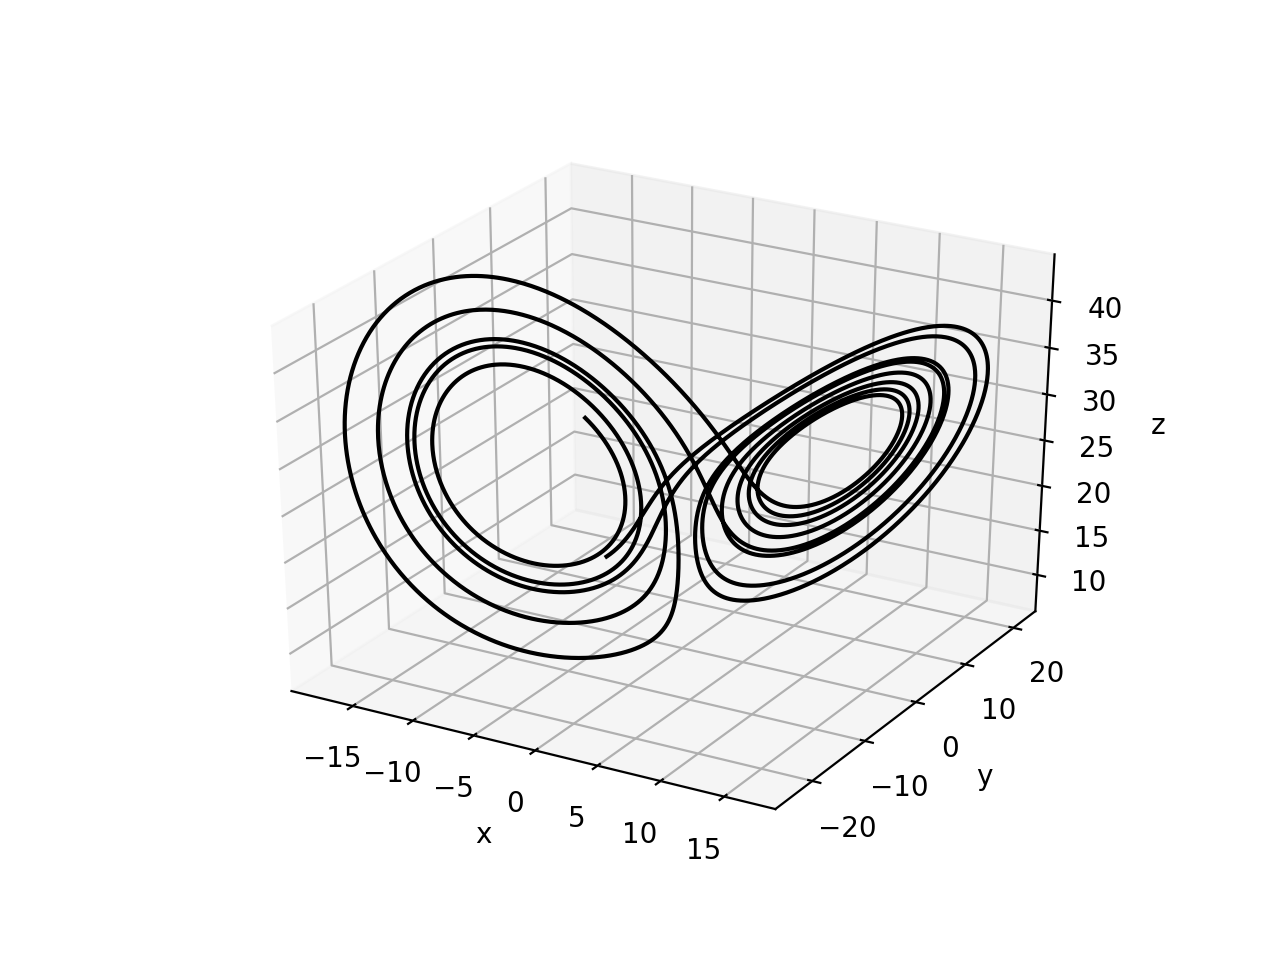

In [8]:
plot3d(x_pts1,y_pts1,z_pts1,'k')

We can also use one of our functions to plot the cross sections of the 3D plot to get a sense of what is happening in each of the planes in the model.

<IPython.core.display.Javascript object>


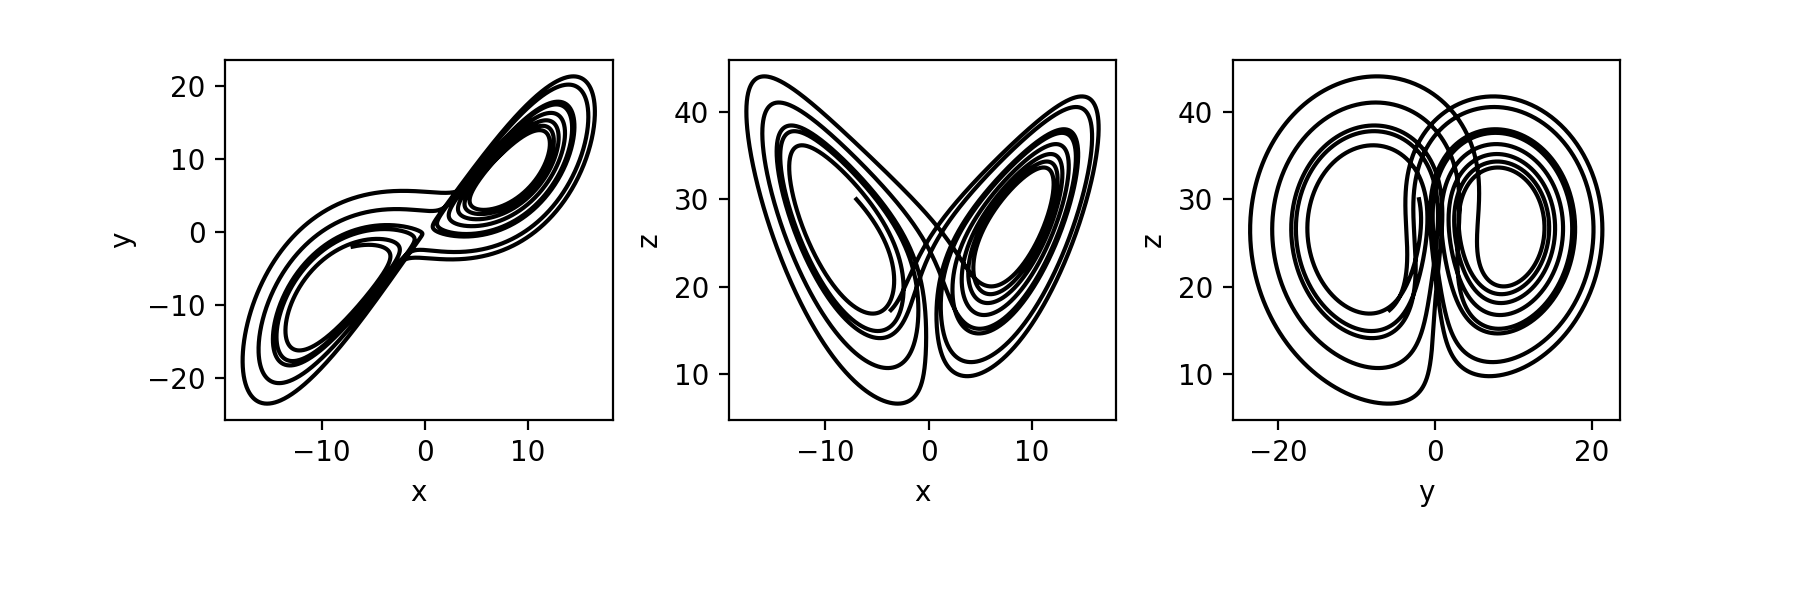

In [9]:
plt.figure(figsize=(9,3))
gridplot(x_pts1,y_pts1,z_pts1,'k')
#plot2d(x_pts,z_pts,'x','z');plot2d(x_pts,y_pts,'x','y');plot2d(y_pts,z_pts,'y','z')

Here we can see that we have a system with two fixed attractors that represent the steady states of the system.  This would be where the temperature difference for the system is causing the fluid flow to pass the fluid to equilibrium smoothly.  For fun, we could also see how this evolves in time to interact with these attractors by animating the system.  To do this I used the matplotlib animation library and its function FuncAnimation.

<IPython.core.display.Javascript object>


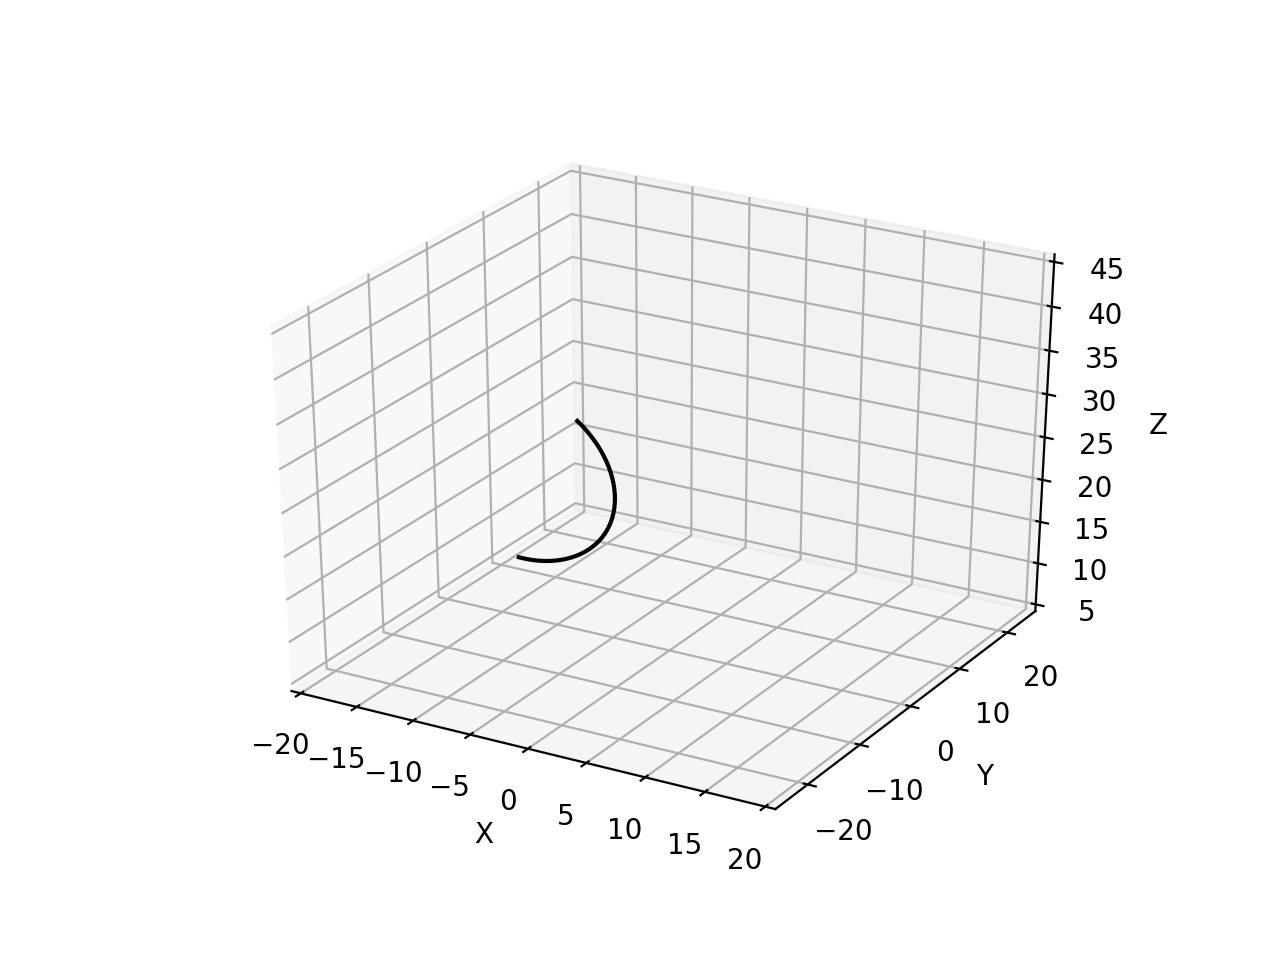

In [11]:
from matplotlib.animation import FuncAnimation
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata, ydata,zdata = [], [],[]
ln, = ax.plot3D([], [],[], 'k',animated=False)

def update(frame):
    
    xdata.append(x_pts1[frame])
    ydata.append(y_pts1[frame])  #updates the frame as it loops
    zdata.append(z_pts1[frame])   
    
    ln.set_data(xdata, ydata)
    ln.set_3d_properties(zdata)
    return ln,

ax.set_xlim3d([-20, 20])
ax.set_xlabel('X')

ax.set_ylim3d([-25, 25])
ax.set_ylabel('Y')

ax.set_zlim3d([5,45])
ax.set_zlabel('Z')

ani = FuncAnimation(fig, update, frames=np.arange(0, len(x_pts1),1), interval=2,blit=True)


## Varying Initial Conditions

Next lets look at what happens if we change the initial conditions for $x$, $y$, and $z$. First I am going to drastically change the parameters, going from the original $x_i=-7$, $y_i=-2$, $z_i=30$ to the new $x_i=-1$, $y_i=-15$, $z_i=-15$. 

<IPython.core.display.Javascript object>


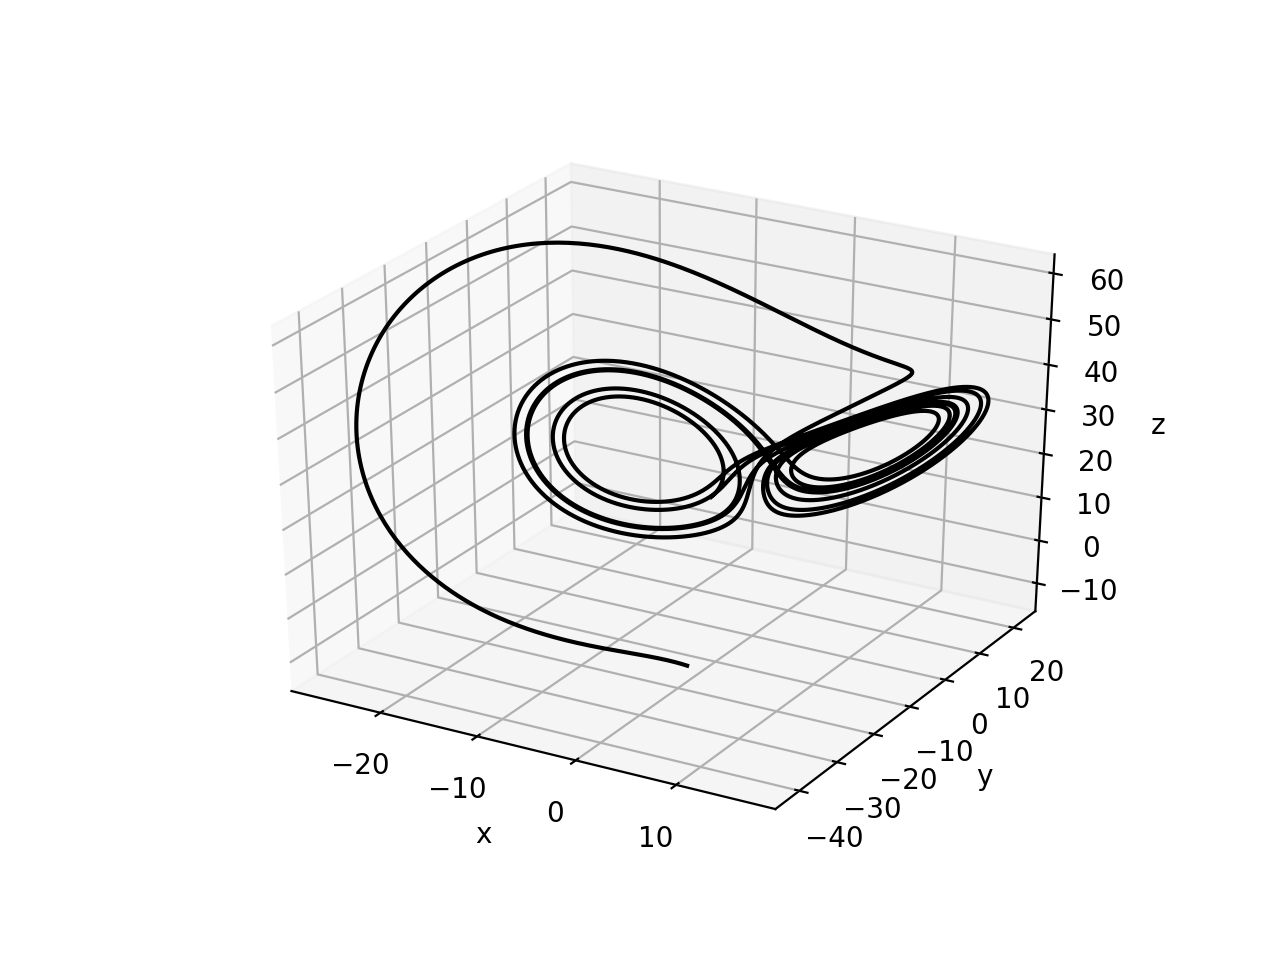

In [12]:
x_pts2,y_pts2,z_pts2 = ppp(-1.0,-15.0,-15.0,10,8/3.0,28.0,'k')

As you can see the diagram takes a very different shape, with two whole new attractors emerging for the steady states of the system.  There is not a lot that can be learned about the system from varying it wildly, though, so let's next look at what happens with small changes in the initial conditions.  We start with a new system that only has one attractor as shown below, following the conditions of $x_i=4,y_i=12,z_i=3$.

<IPython.core.display.Javascript object>


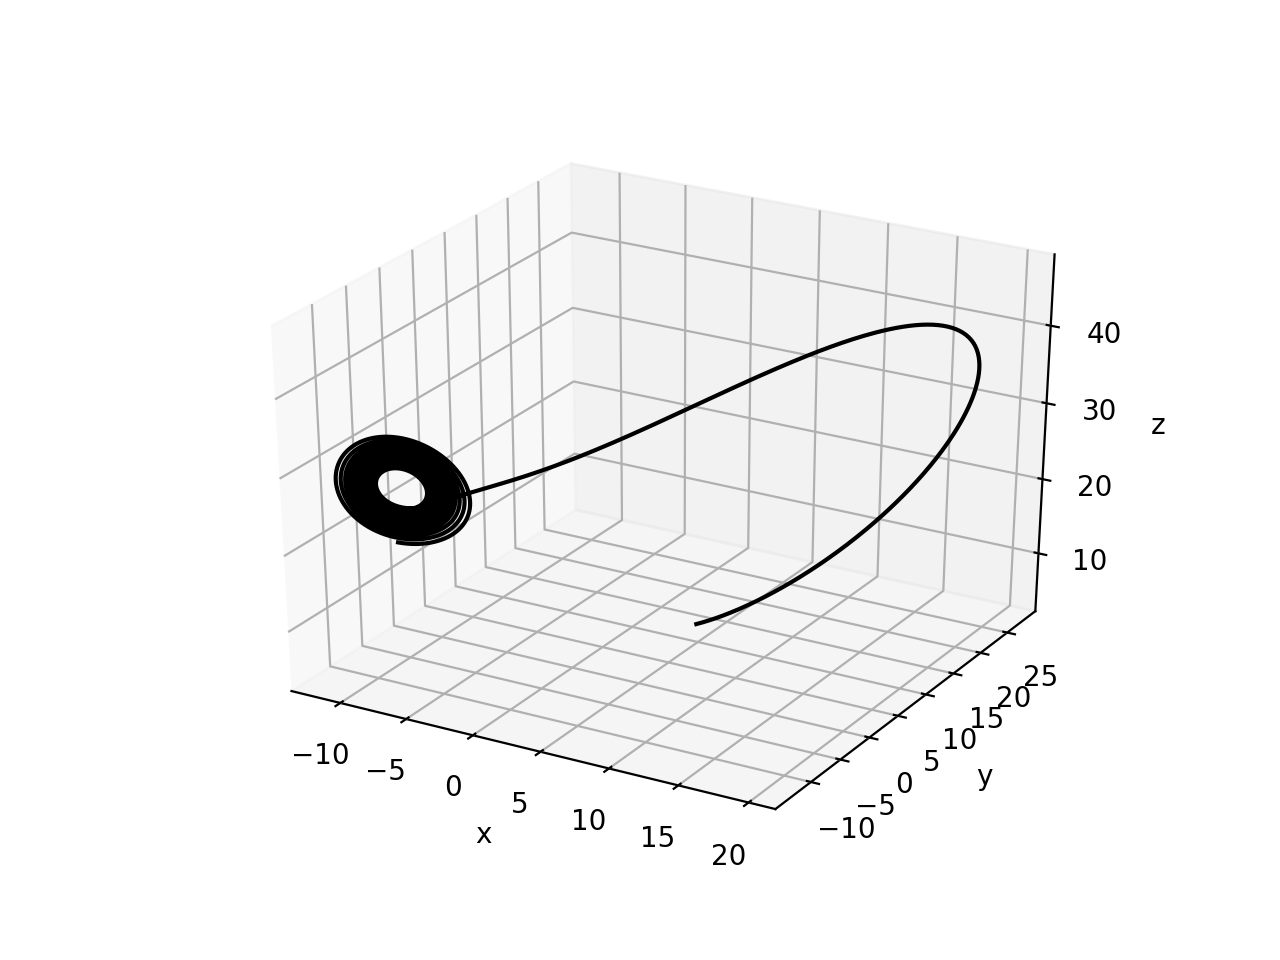

In [13]:
x_pts3,y_pts3,z_pts3 = ppp(4,12,3.0,10,8/3.0,28.0,'k')

The system is strongly drawn to this one attractor given the initial conditions; however, if we slightly vary the initial conditions so that now $x_i=3$, $y_i=10$, and $z_i=4$, we see that the system is not as tightly attracted to the attractor.

<IPython.core.display.Javascript object>


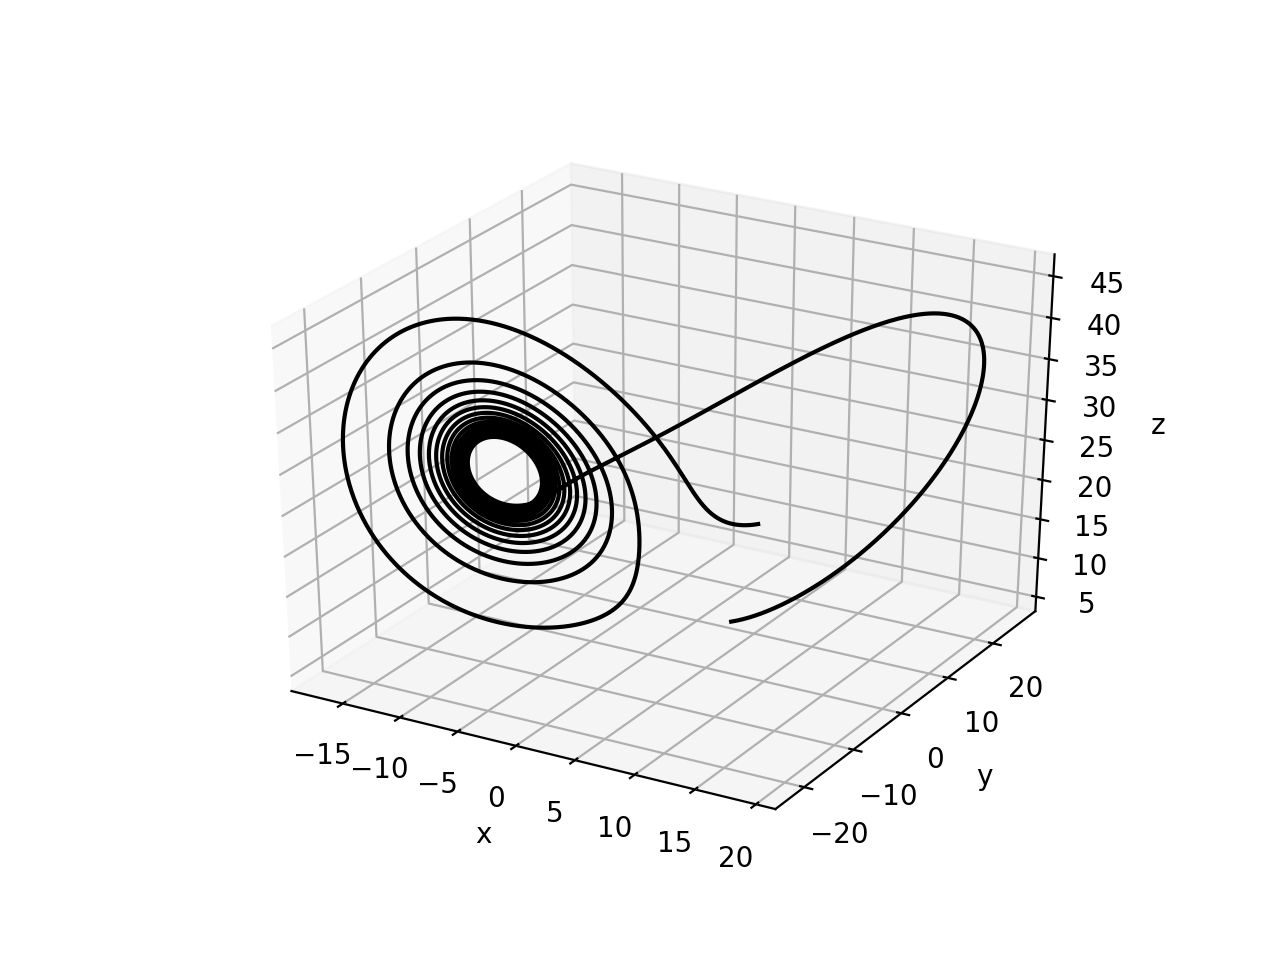

In [14]:
x_pts4,y_pts4,z_pts4 = ppp(3,10,4.0,10,8/3.0,28.0,'k')

<IPython.core.display.Javascript object>


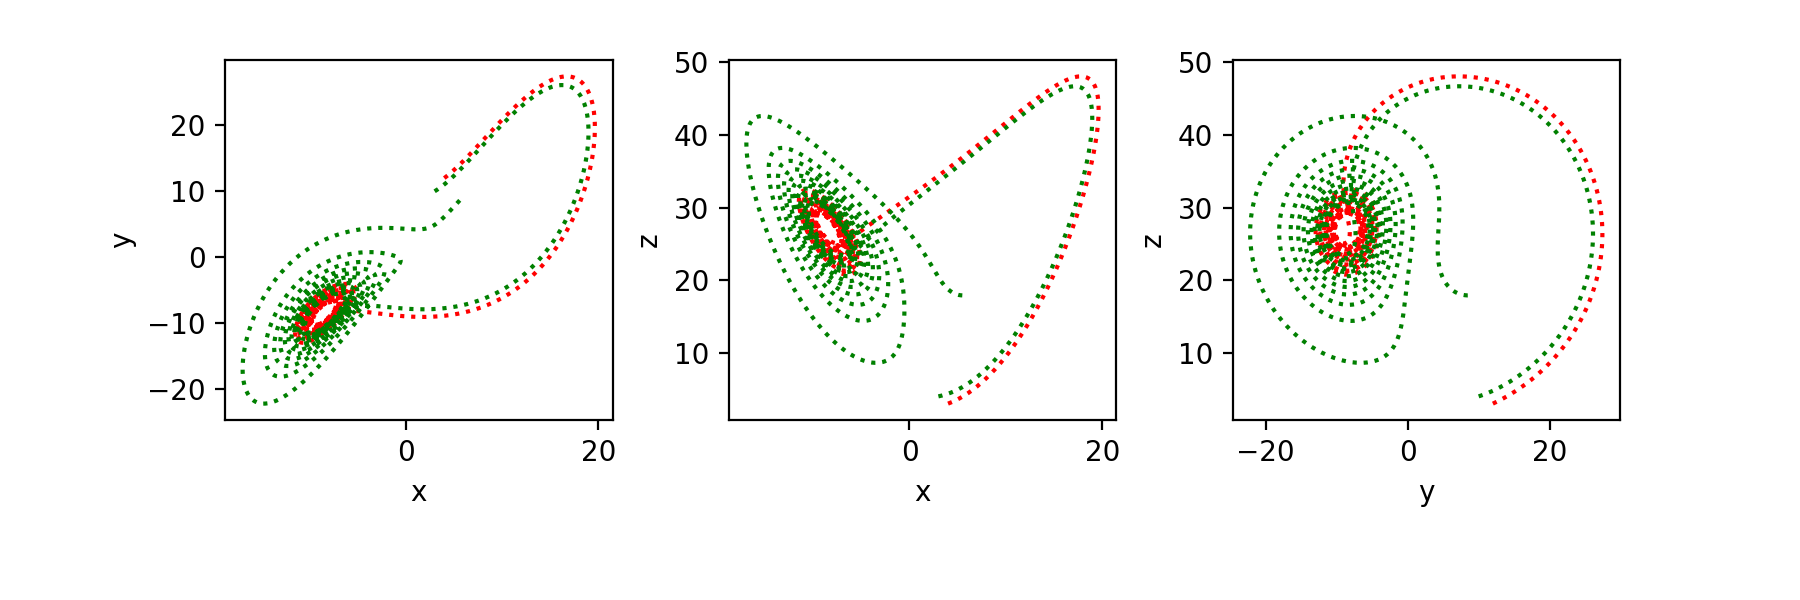

In [15]:
plt.figure(figsize=(9,3))
xlist =[x_pts3,x_pts4];ylist =[y_pts3,y_pts4];zlist =[z_pts3,z_pts4];clist=['r:','g:']
whilegridplot(xlist,ylist,zlist,clist)

Looking at the cross sections we can see that these systems start to diverge from each other.  

Another interesting example comes from the system $x_i=8$, $y_i=-12$, $z_i=-3$.  If you vary the y parameter from just $y_i=-12$ to $y_i=-11$, the direction the attractor tends towards in the plot changes dramatically.  This is shown in the next two figures

<IPython.core.display.Javascript object>


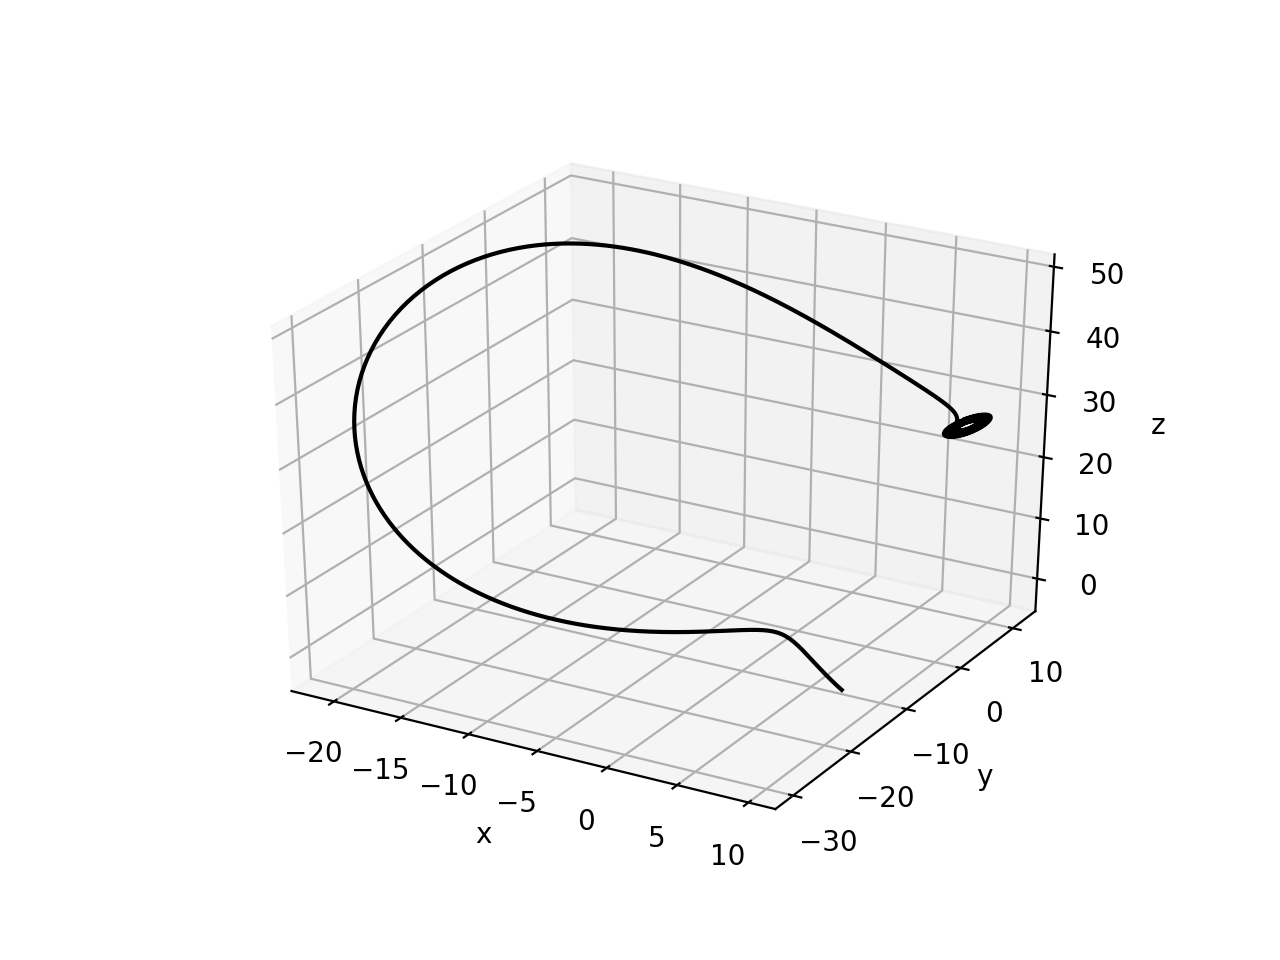

In [16]:
x_pts5,y_pts5,z_pts5 = ppp(8,-12,-3.0,10,8/3.0,28.0,'k')

<IPython.core.display.Javascript object>


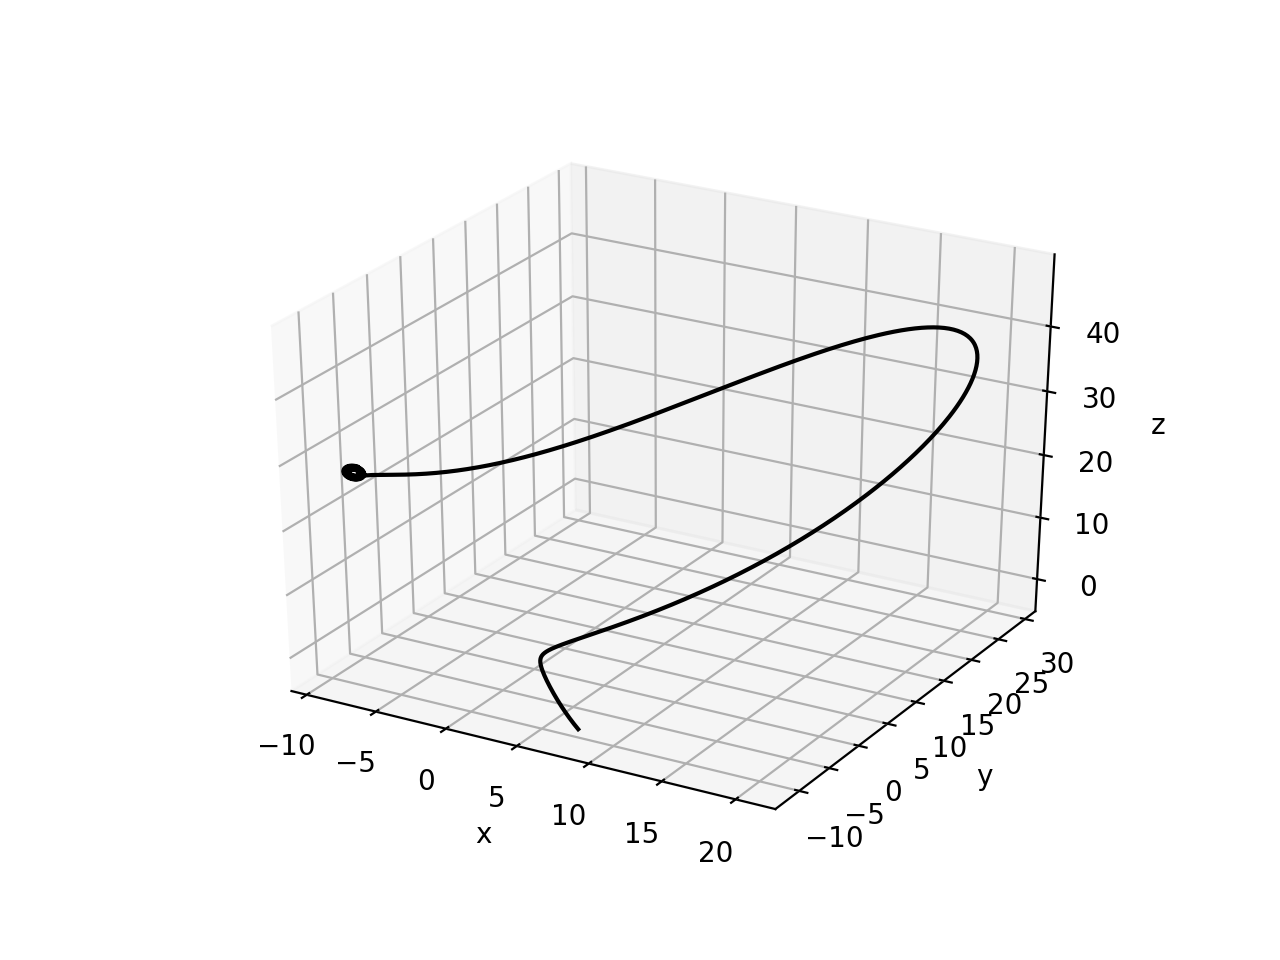

In [18]:
x_pts6,y_pts6,z_pts6 = ppp(8,-11,-3.0,10,8/3.0,28.0,'k')

<IPython.core.display.Javascript object>


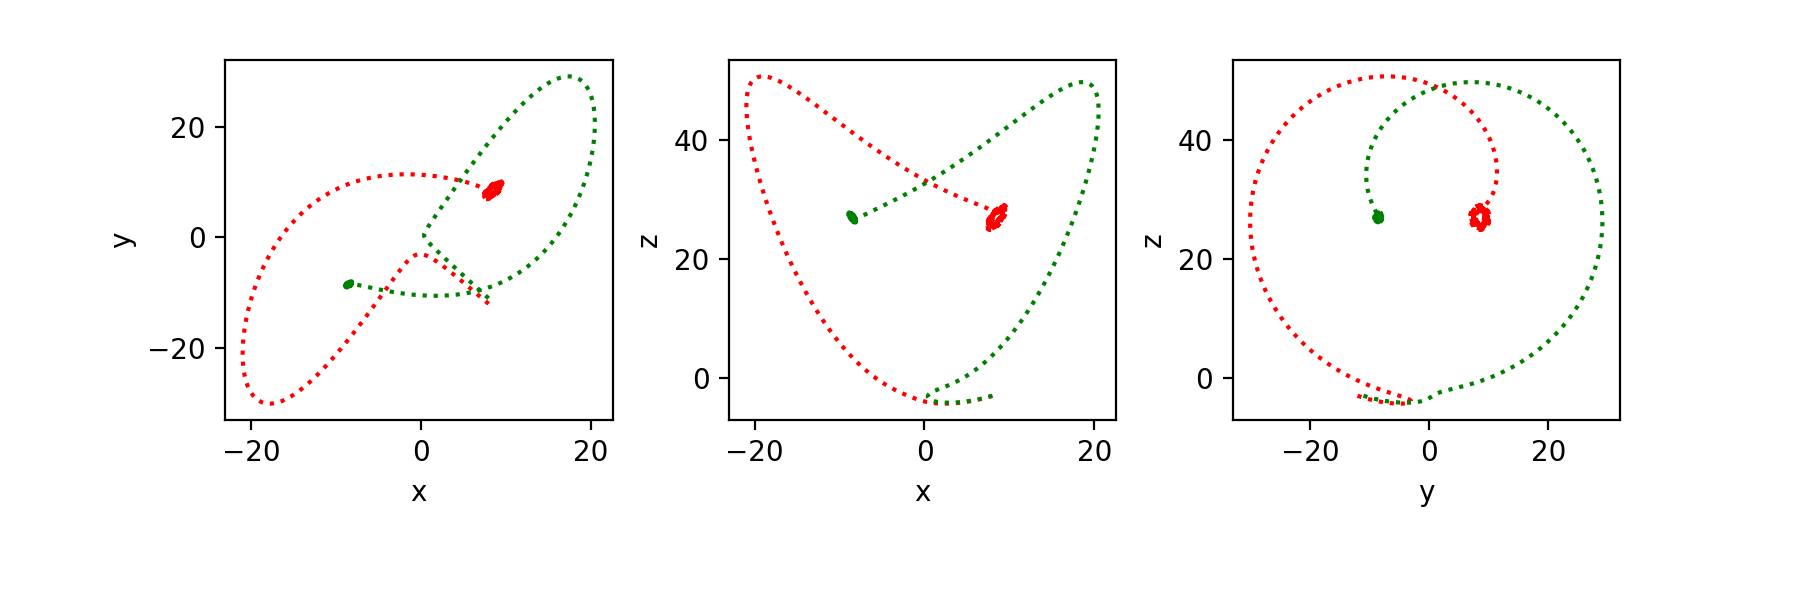

In [19]:
plt.figure(figsize=(9,3))
xlist =[x_pts5,x_pts6];ylist =[y_pts5,y_pts6];zlist =[z_pts5,z_pts6];clist=['r:','g:']
whilegridplot(xlist,ylist,zlist,clist)

As we can see, these are almost mirror images of each other.  Another thing that we can draw from this is that the model is very sensitive to the initial conditions that it is given.  It may be possible to even have a case where you create one attractor for one set of conditions, and two for a slightly different set.  By playing with a lot of the parameters one could maybe find this.

## Varying Parameters

Now let's see what happens if we vary $\sigma$, $b$, and $r$ while keeping the conditions the same.  We will start by going back to our original model.  Then I'm going to modify the parameters in the subsequent plots, some drastically and some slightly.

<IPython.core.display.Javascript object>


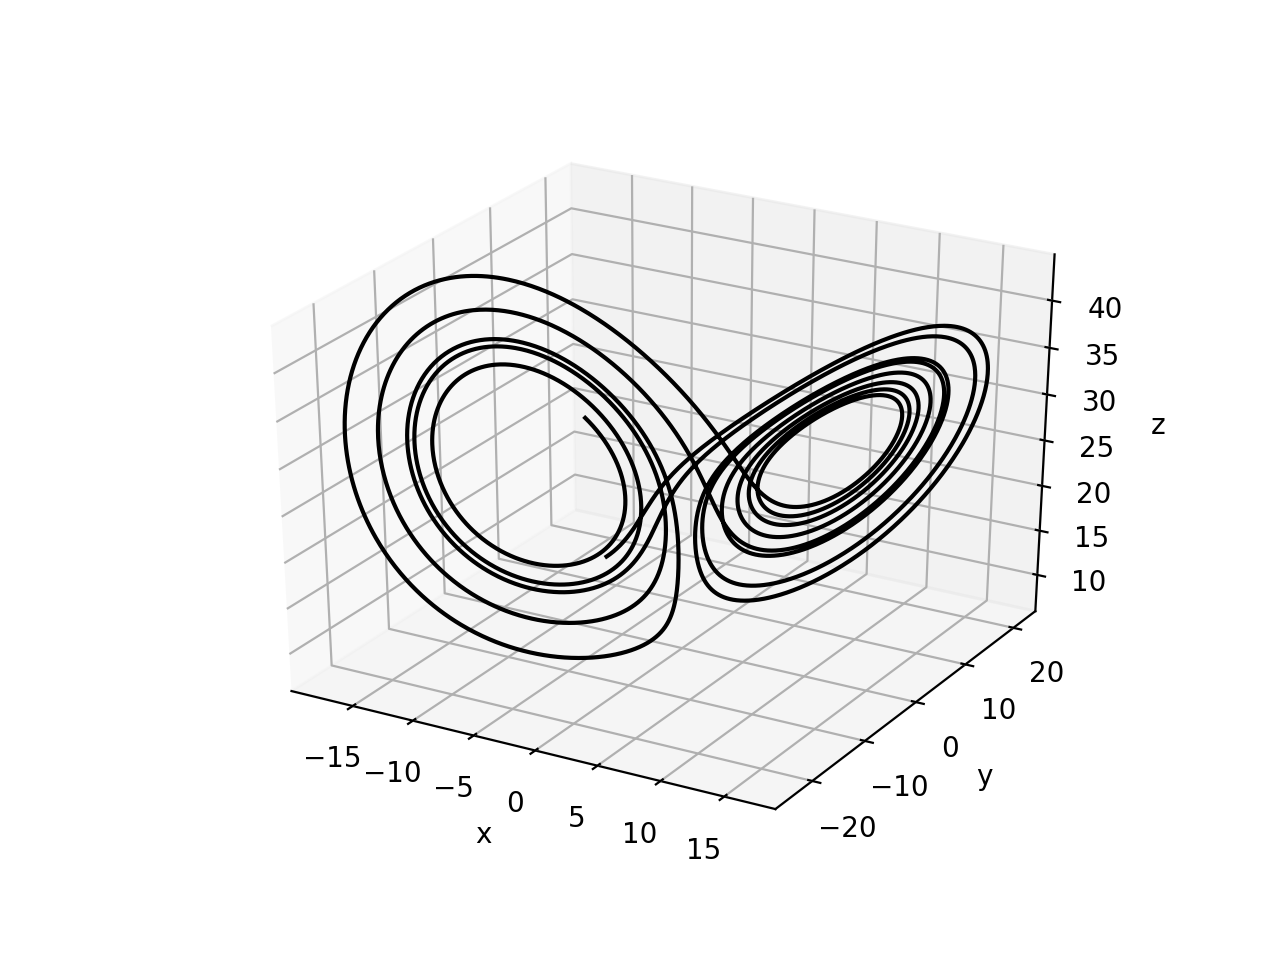

In [20]:
x_pts8,y_pts8,z_pts8 = ppp(-7.0,-2.0,30.0,10,8/3.0,28,'k')

<IPython.core.display.Javascript object>


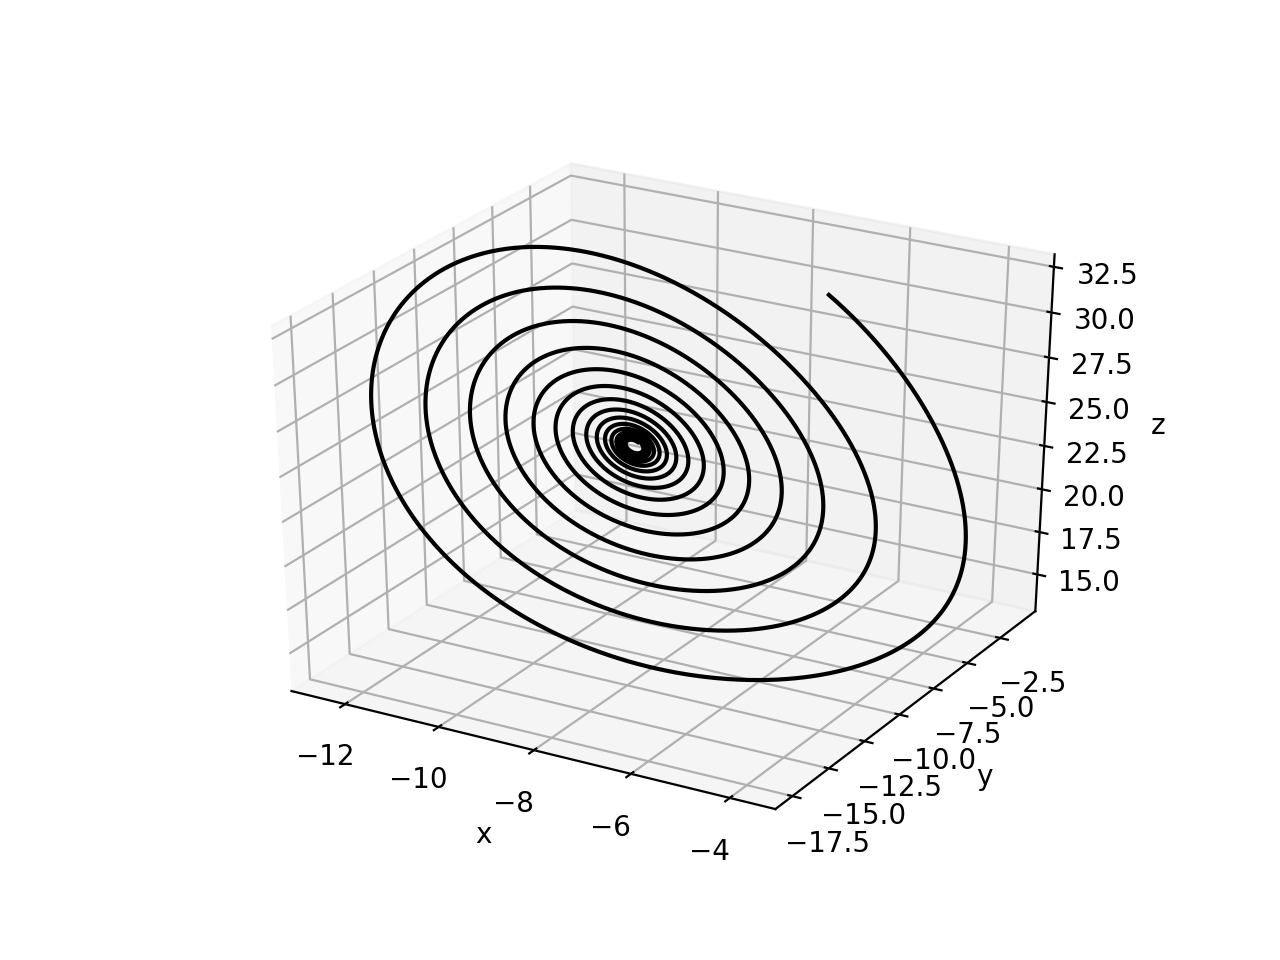

In [21]:
x_pts9,y_pts9,z_pts9 = ppp(-7.0,-2.0,30.0,5,10/3,25,'k')

<IPython.core.display.Javascript object>


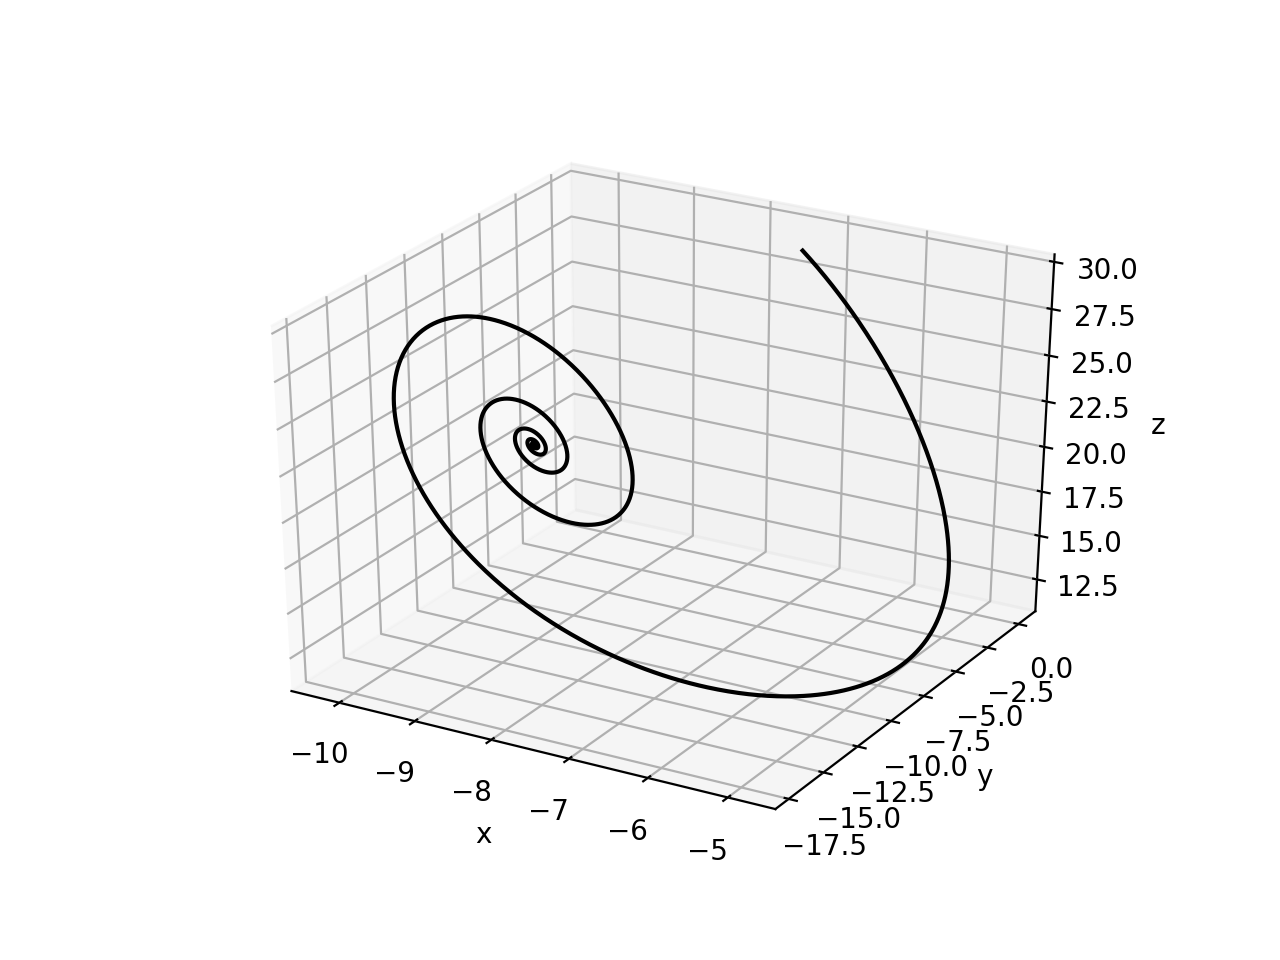

In [22]:
x_pts10,y_pts10,z_pts10 = ppp(-7.0,-2.0,30.0,2,4,22,'k')

<IPython.core.display.Javascript object>


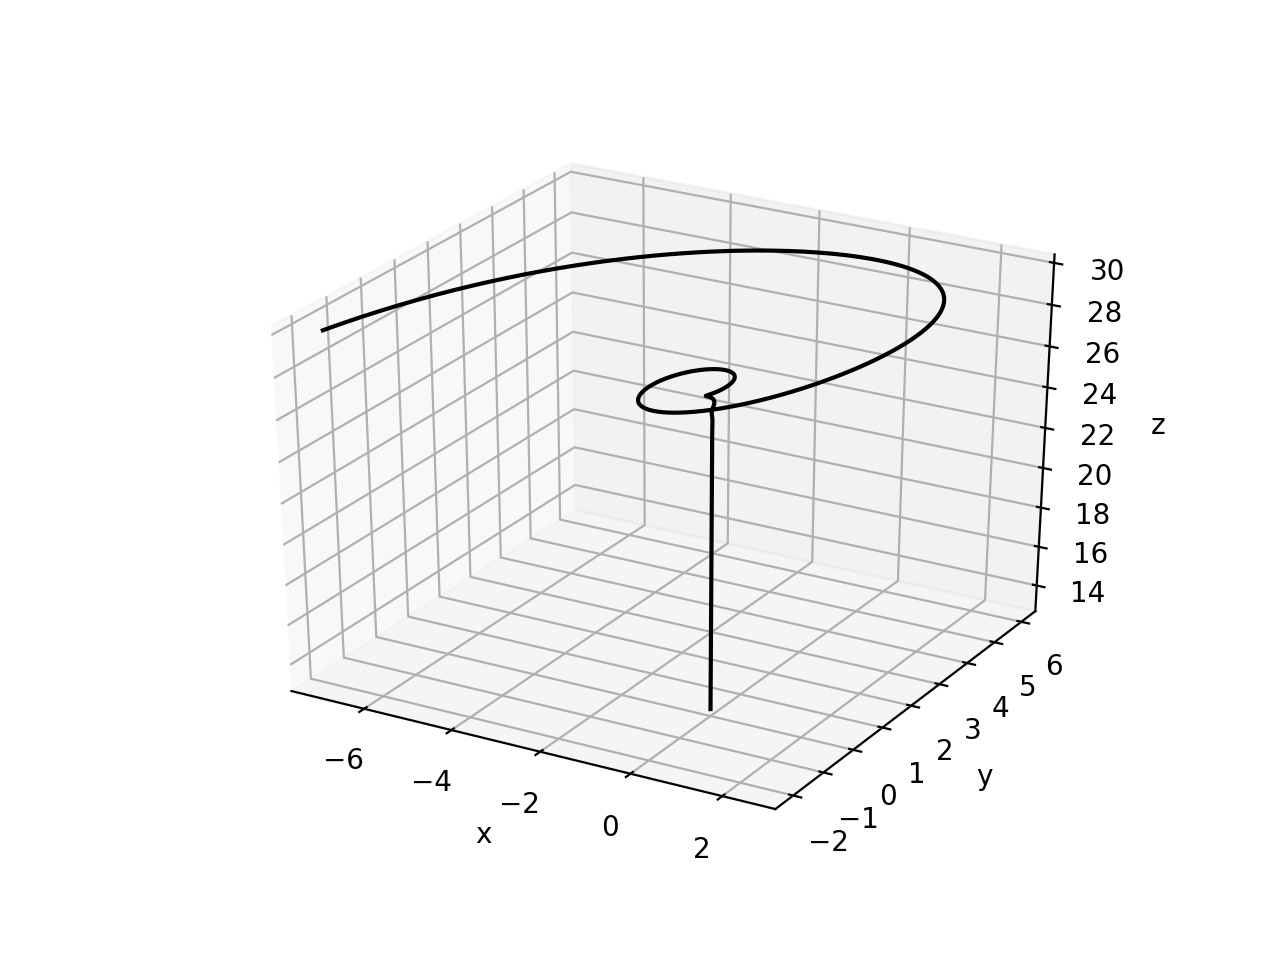

In [23]:
x_pts11,y_pts11,z_pts11 = ppp(-7.0,-2.0,30.0,12,1/12,2,'k')

<IPython.core.display.Javascript object>


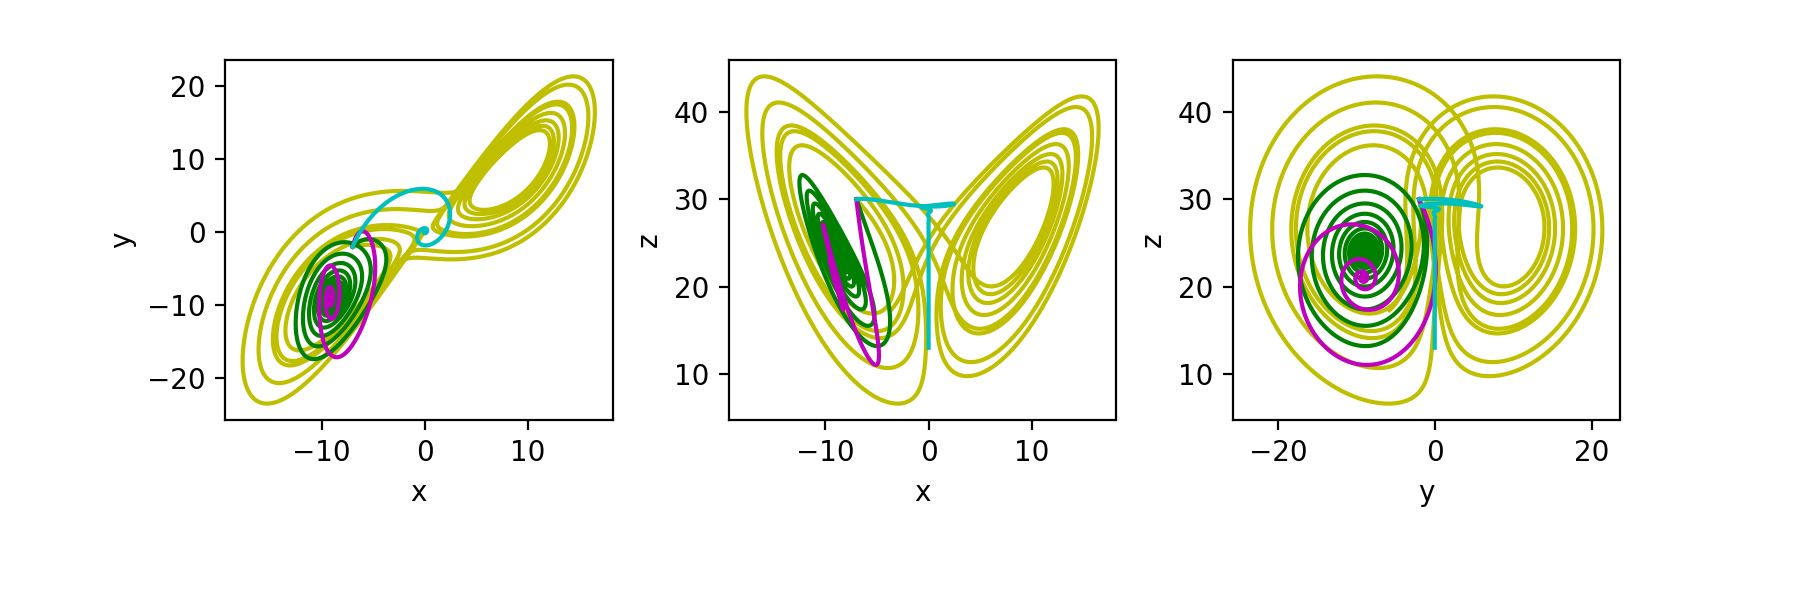

In [24]:
xlist = [x_pts8,x_pts9,x_pts10,x_pts11];ylist = [y_pts8,y_pts9,y_pts10,y_pts11];zlist = [z_pts8,z_pts9,z_pts10,z_pts11]
clist = ['y','g','m','c']
plt.figure(figsize=(9,3))
whilegridplot(xlist,ylist,zlist,clist)

As you can see again, the system can evolve very differently from similar parameters, even with the same initial conditions.  This was talked about by Lorenz when he orginally came up with the model, and you can really see it here!

## Curiosity Exploration

I was curious about the last of the plots that I made, so I tried to investigate further by looking into the evolution of the system; however, I was not able to draw a lot of conclusions from it.  It was cool to look at the plot, though, as it is very different than all the other ones.

In [25]:
def make_lists2(xi,yi,zi,a,c,d):
    #xi = -7.0; yi = -2.0; zi = 30.0; 
    t = 0; dt = 0.001

    x_pts = [xi]; y_pts = [yi]; z_pts = [zi]; t_pts = [t]

    y0 = [xi,yi,zi]
    global sigma; sigma = a
    global b; b = c
    global r; r = d

    while t<30:
        y1 = ode.RK4n(lorenz_model,y0,t,dt)
        for i in range(len(y1)): #reset y0 to the new vector
            y0[i] = y1[i]

        x = y0[0]; y = y0[1]; z = y0[2]

        t+=dt

        x_pts.append(x); y_pts.append(y); z_pts.append(z); t_pts.append(t)
    return x_pts,y_pts,z_pts

In [26]:
xs, ys, zs = make_lists2(-7.0,-2.0,30.0,12,1/12,2)

<IPython.core.display.Javascript object>


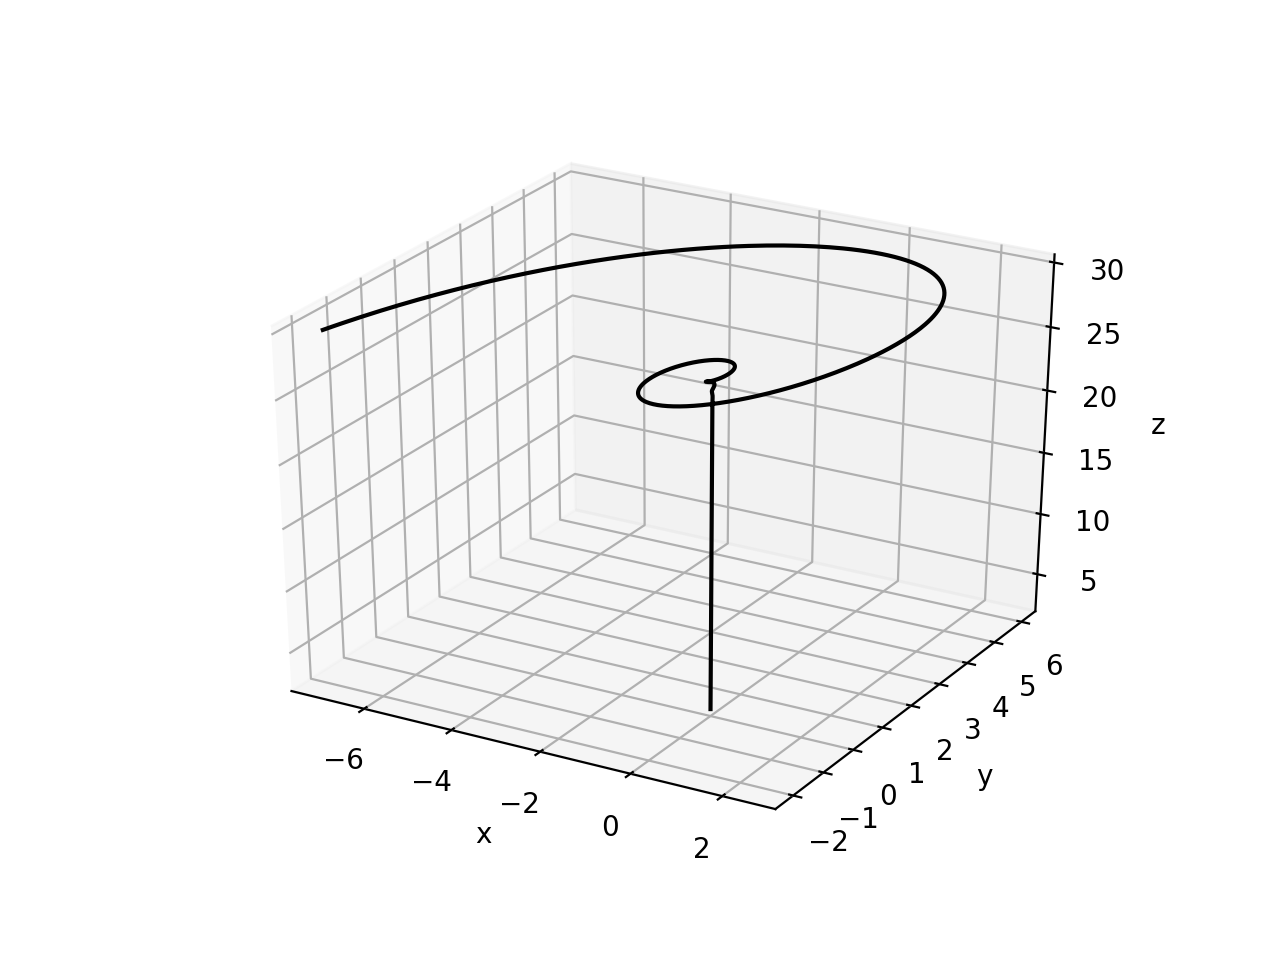

In [27]:
plot3d(xs,ys,zs,'k')

<IPython.core.display.Javascript object>


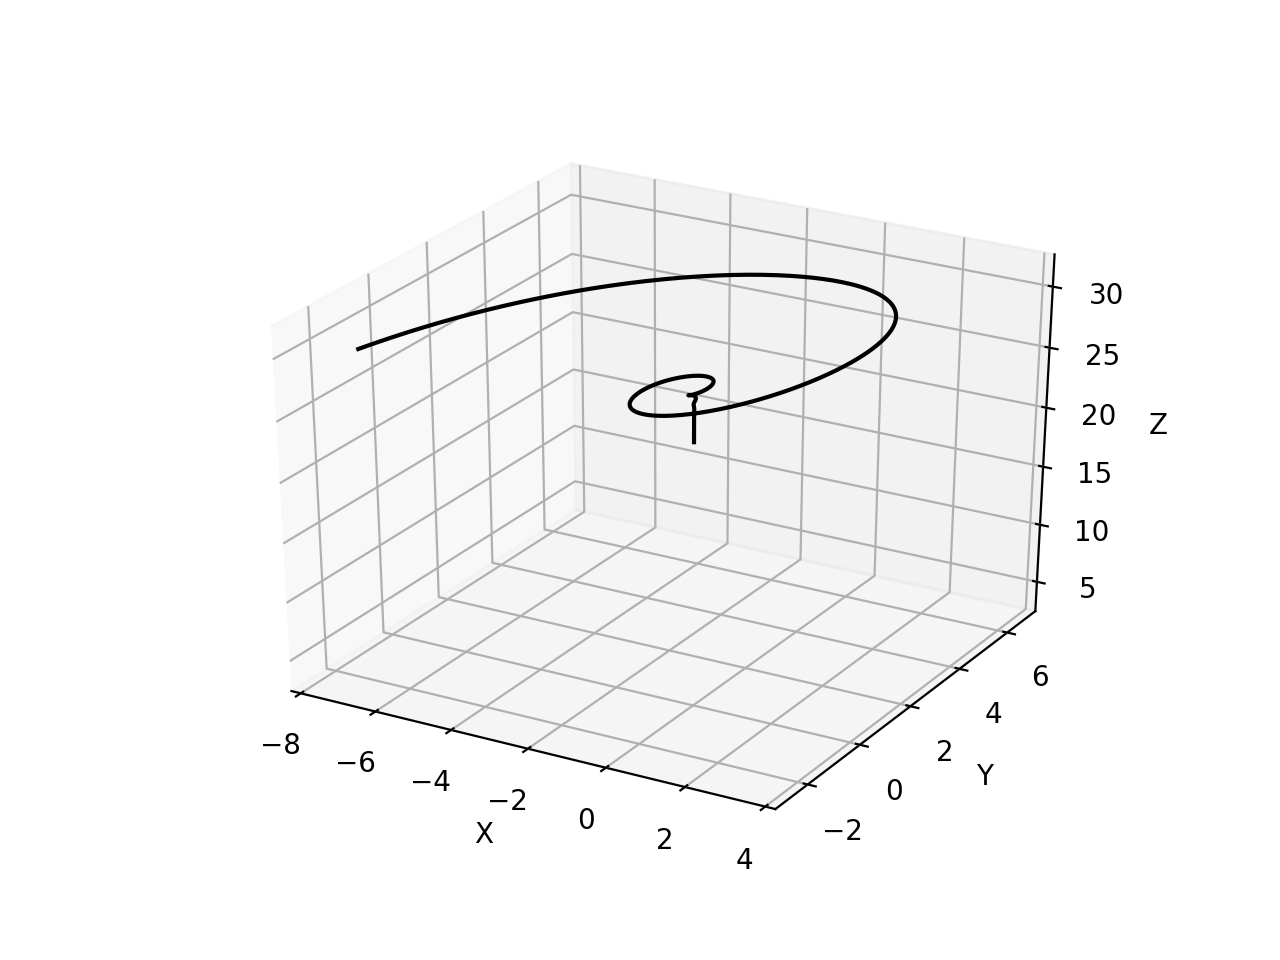

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata, ydata,zdata = [], [],[]
ln, = ax.plot3D([], [],[], 'k',animated=False)

#def init():
    
    #return ln,

def update(frame):
    
    xdata.append(xs[frame])
    ydata.append(ys[frame])
    zdata.append(zs[frame])   
    
    ln.set_data(xdata, ydata)
    ln.set_3d_properties(zdata)
    return ln,

ax.set_xlim3d([-8, 4])
ax.set_xlabel('X')

ax.set_ylim3d([-3, 7])
ax.set_ylabel('Y')

ax.set_zlim3d([3,32])
ax.set_zlabel('Z')

ani = FuncAnimation(fig, update, frames=np.arange(0, len(xs),1), interval=1,blit=True)


# Summary
We sought to create and explore the Lorenz model.  We created an animation of the model using the FuncAnimation package in matplotlib.  Next we varied the initial parameters and conditions of the system to confirm that the model is highly sensitive these changes, exploring cross-sections and overplots to verify the differences in the model.  Finally we investigated an interesting case that came from some of the parameter changes, and we animated this system to see how it evolved.